# 1. Count audiofiles (.wav, .flac)

In [28]:
import glob

In [93]:
train_directory_path = ['/data/nota/audio_data/audiocaps_1m/*/*.wav',
                  '/data/nota/audio_data/Clotho/*/*.wav',
                  '/data/nota/audio_data/GigaSpeech/*/*.wav',
                  '/data/nota/audio_data/LibriSpeech/*/*/*/*.wav',
                  '/data/nota/audio_data/MusicNet/*/*.wav',
                  '/data/nota/audio_data/WavCaps/AudioSet_SL/*.wav',
                  '/data/nota/audio_data/WavCaps/BBC_Sound_Effects/*.wav',
                  '/data/nota/audio_data/WavCaps/FreeSound/*/*.wav',
                  '/data/nota/audio_data/WavCaps/SoundBible/*.wav',
                  '/data/nota/audio_data/audiocaps_1m/*/*.flac',
                  '/data/nota/audio_data/Clotho/*/*.flac',
                  '/data/nota/audio_data/GigaSpeech/*/*.flac',
                  '/data/nota/audio_data/LibriSpeech/*/*/*/*.flac',
                  '/data/nota/audio_data/MusicNet/*/*.flac',
                  '/data/nota/audio_data/WavCaps/AudioSet_SL/*.flac',
                  '/data/nota/audio_data/WavCaps/BBC_Sound_Effects/*.flac',
                  '/data/nota/audio_data/WavCaps/FreeSound/*/*.flac',
                  '/data/nota/audio_data/WavCaps/SoundBible/*.flac'
                  ]

test_directory_path = ['/data/nota/audio_data/audiocaps_1m/test/*.wav',
                       '/data/nota/audio_data/LibriSpeech/test-other/*/*/*.flac']

In [123]:
total = 0
test_total = 0

for i in range(len(train_directory_path)):
    file_count = len(glob.glob(train_directory_path[i]))
    if file_count > 0:
        print(f'{train_directory_path[i][22:]}: {file_count}개')
    total += file_count

print()
print(f'Total 오디오 파일: {total}개')
print()

for i in range(len(test_directory_path)):
    test_file_count = len(glob.glob(test_directory_path[i]))
    print(f'{test_directory_path[i][22:]} => {test_file_count}개')
    test_total += test_file_count

print()
print(f'Train 오디오 파일: {total - test_total}개')
print(f'Test 오디오 파일: {test_total}개')

audiocaps_1m/*/*.wav: 51002개
Clotho/*/*.wav: 2893개
GigaSpeech/*/*.wav: 910140개
MusicNet/*/*.wav: 320개
LibriSpeech/*/*/*/*.flac: 284180개
WavCaps/AudioSet_SL/*.flac: 107311개
WavCaps/BBC_Sound_Effects/*.flac: 23791개
WavCaps/FreeSound/*/*.flac: 236289개
WavCaps/SoundBible/*.flac: 1090개

Total 오디오 파일: 1617016개

audiocaps_1m/test/*.wav => 4355개
LibriSpeech/test-other/*/*/*.flac => 2939개

Train 오디오 파일: 1609722개
Test 오디오 파일: 7294개


In [ ]:
import os

directory_path = '/data/nota/audio_data'

file_count = 0

for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith('.wav') or file.endswith('.flac'):
            file_count += 1

print(f'하위 디렉토리 포함 .wav, .flac 파일 개수: {file_count}')


하위 디렉토리 포함 .wav, .flac 파일 개수: 1617016


In [10]:
from pathlib import Path

directory_path = Path('/data/nota/audio_data')

files = list(directory_path.rglob('*.wav')) + list(directory_path.rglob('*.flac'))  # '*'는 모든 파일을 의미

file_count = len([f for f in files if f.is_file()])  # 파일만 셈
print(f'하위 디렉토리 포함 .wav, .flac 파일 개수: {file_count}')

하위 디렉토리 포함 .wav, .flac 파일 개수: 1617016


# 2. Train

## Make CSV (with duration)

In [116]:
import librosa

y, sr = librosa.load('/data/nota/audio_data/audiocaps_1m/train/0.wav', sr=None)
duration = librosa.get_duration(y=y, sr=sr)

print(duration)

23.638


In [ ]:
import json
import pandas as pd
import librosa
from tqdm import tqdm

json_path = '/data/nota/level4-cv-finalproject-hackathon-cv-03-lv3/audio_data/stage1_train.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

ann = data.get('annotation', [])

audio_length = []

for item in tqdm(ann):
    audio_path = item.get('path','')
    if audio_path[0] == '/':
        audio_path = audio_path[1:]

    full_path = os.path.join('/data/nota/audio_data/', audio_path)
    y, sr = librosa.load(full_path, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)

    text = item.get('text', '')
    task = item.get('task', '')
    Q = item.get('Q', None)

    audio_length.append({'path':audio_path, 'duration':duration, 'text':text, 'task':task, 'Q':Q})

stage1_df = pd.DataFrame(audio_length)
stage1_df.to_csv('/data/nota/EDA/stage1_train.csv', sep=',', encoding='utf-8', header=True)

In [35]:
import json
import pandas as pd
import librosa
from tqdm import tqdm

json_path = '../eda용json/train/stage2_train.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

ann = data.get('annotation', [])

audio_length = []

for item in tqdm(ann):
    audio_path = item.get('path','')
    if audio_path[0] == '/':
        audio_path = audio_path[1:]

    full_path = os.path.join('/data/nota/audio_data/', audio_path)
    y, sr = librosa.load(full_path, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)

    text = item.get('text', '')
    task = item.get('task', '')
    Q = item.get('Q', None)

    audio_length.append({'path':audio_path, 'duration':duration, 'text':text, 'task':task, 'Q':Q})

stage2_df = pd.DataFrame(audio_length)
stage2_df.to_csv('/data/nota/EDA/stage2_train.csv', sep=',', encoding='utf-8', header=True)

100%|██████████| 1403890/1403890 [2:48:08<00:00, 139.16it/s]  


### Dataset Type

- stage1 : ASR
- stage2 : AAC
- 따로 데이터셋의 이름을 정해주지 않았지만 각 스테이지는 위 두개를 바탕으로 진행하다는 사실 파악

In [ ]:
stage1['Dataset'] = stage1['path'].apply(lambda x : x.split('/')[0])
stage2['Dataset'] = stage2['path'].apply(lambda x : x.split('/')[0])

display(stage1['Dataset'].value_counts())
display(stage2['Dataset'].value_counts())

Dataset
GigaSpeech     910140
WavCaps        367712
LibriSpeech    281241
Clotho          14465
Name: count, dtype: int64

Dataset
LibriSpeech     872056
WavCaps         270402
GigaSpeech      200000
audiocaps_1m     46647
Clotho           14465
MusicNet           320
Name: count, dtype: int64

### Task Type

In [ ]:
import os
import json
from collections import Counter

# JSON 파일들이 있는 폴더 경로
folder_path = "/data/nota/eda용json/train"

# 모든 JSON 파일에서 'task' 카테고리 합산
category_counts = Counter()

# 폴더 내 JSON 파일 반복 처리
for file_name in os.listdir(folder_path):
    if file_name.endswith(".json"):  # JSON 파일만 처리
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, "r", encoding="utf-8") as file:
            data = json.load(file)
            annotations = data.get("annotation", [])
            task_categories = [item.get("task") for item in annotations if "task" in item]
            category_counts.update(task_categories)  # 현재 파일의 카테고리 개수 합산

# 결과 출력
for category, count in category_counts.items():
    print(f"'{category}': {count}개")


'asr': 1672622개
'audiocaption': 382177개
'QA': 551759개
'phone_recognition': 281239개
'audiocaption_v2': 61112개
'gender_recognition': 28539개


## EDA audio length & audio Text length

### Duration > 30sec

In [1]:
import pandas as pd
stage1_df = pd.read_csv('/data/nota/EDA/stage1_train.csv')
stage2_df = pd.read_csv('/data/nota/EDA/stage2_train.csv')

In [3]:
c = stage1_df['duration'] > 30.0
stage1_df[c]['task'].value_counts()

task
audiocaption    96590
Name: count, dtype: int64

In [4]:
stage1_df[c]

,Unnamed: 0,path,duration,text,task,Q
1298693,1298693,WavCaps/FreeSound/150000-180000/439733.flac,68.256500,Someone is shaking poppy seeds.,audiocaption,NaN
1298694,1298694,WavCaps/FreeSound/150000-180000/487222.flac,142.089500,Cloth movement is heard.,audiocaption,NaN
1298699,1298699,WavCaps/FreeSound/30000-60000/93305.flac,105.600000,A train is arriving at a station.,audiocaption,NaN
1298704,1298704,WavCaps/FreeSound/60000-90000/158596.flac,92.064312,Machine is in use and people are talking in a ...,audiocaption,NaN
1298708,1298708,WavCaps/FreeSound/120000-150000/367229.flac,170.749437,Someone is walking in a park.,audiocaption,NaN
...,...,...,...,...,...,...
1557995,1557995,WavCaps/BBC_Sound_Effects/NHU05017103.flac,125.968375,Monkeys are making calls and birds are singing.,audiocaption,NaN
1557996,1557996,WavCaps/BBC_Sound_Effects/NHU05064080.flac,67.764313,Birds are calling.,audiocaption,NaN
1557997,1557997,WavCaps/BBC_Sound_Effects/NHU05010028.flac,47.535625,Calls are heard in a bird colony. Wingbeats fr...,audiocaption,NaN
1557999,1557999,WavCaps/BBC_Sound_Effects/NHU05073111.flac,62.553938,Wind is blowing through palm fronds.,audiocaption,NaN


In [3]:
c = stage2_df['duration'] > 30.0
stage2_df[c]['task'].value_counts()

task
audiocaption_v2    31913
QA                   320
Name: count, dtype: int64

In [4]:
stage2_df[c]

,Unnamed: 0,path,duration,text,task,Q
17,17,audiocaps_1m/train/65022.wav,60.000,"Water pouring out, a male and woman speaking",audiocaption_v2,NaN
91,91,audiocaps_1m/train/61159.wav,60.000,A sewing machine runs slowly,audiocaption_v2,NaN
109,109,audiocaps_1m/train/91973.wav,60.000,Someone is talking normally as birds squawk in...,audiocaption_v2,NaN
130,130,audiocaps_1m/train/87497.wav,60.000,A man speaks followed by hard clicking typing,audiocaption_v2,NaN
198,198,audiocaps_1m/train/39585.wav,39.711,Woman talking while a dog barks and woman make...,audiocaption_v2,NaN
...,...,...,...,...,...,...
1403641,1403641,audiocaps_1m/train/109407.wav,60.000,Birds chirp and animals vocalize,audiocaption_v2,NaN
1403718,1403718,audiocaps_1m/train/19511.wav,60.000,"Rustling, hissing and rattling are present, an...",audiocaption_v2,NaN
1403733,1403733,audiocaps_1m/train/101675.wav,60.000,A man speaks with several clicks and ticks,audiocaption_v2,NaN
1403867,1403867,audiocaps_1m/train/17650.wav,40.937,"A deep hum is present, a cat meows, and a pers...",audiocaption_v2,NaN


### Duration < 1sec

In [51]:
stage1_df[c]['task'].value_counts()

task
asr             41767
audiocaption       25
Name: count, dtype: int64

In [5]:
c = stage1_df['duration'] < 1.0
stage1_df[c]

,Unnamed: 0,path,duration,text,task,Q
169251,169251,LibriSpeech/train-other-500/3033/130750/3033-1...,0.830000,I,asr,NaN
178097,178097,LibriSpeech/train-other-500/3557/8342/3557-834...,0.920000,I have,asr,NaN
281257,281257,GigaSpeech/18/YOU0000000491_S0000106.wav,0.810000,"By the way,",asr,NaN
281275,281275,GigaSpeech/8/POD0000000240_S0000231.wav,0.980000,"Nothing special,",asr,NaN
281278,281278,GigaSpeech/18/YOU0000000113_S0000439.wav,0.730000,"Again,",asr,NaN
...,...,...,...,...,...,...
1273029,1273029,WavCaps/AudioSet_SL/Y3Y_esee5qr8.flac,0.975250,Sound effects play.,audiocaption,NaN
1292000,1292000,WavCaps/AudioSet_SL/Y-xNzcshM6Bo.flac,0.580500,A snort is heard.,audiocaption,NaN
1292588,1292588,WavCaps/AudioSet_SL/YeNb-ZoDx1r4.flac,0.473500,A sound effect is heard.,audiocaption,NaN
1293312,1293312,WavCaps/AudioSet_SL/Yb7eg5WmiPKg.flac,0.835938,Static noise can be heard.,audiocaption,NaN


In [7]:
stage2_df[c]['task'].value_counts()

task
asr                  9182
QA                     27
audiocaption_v2         6
phone_recognition       2
Name: count, dtype: int64

In [13]:
c = stage2_df['duration'] < 1.0
stage2_df[c]

,Unnamed: 0,path,duration,text,task,Q
55,55,GigaSpeech/19/YOU0000002191_S0000054.wav,0.87,Or bo?,asr,NaN
396,396,GigaSpeech/21/YOU0000004637_S0000644.wav,0.78,"But,",asr,NaN
553,553,GigaSpeech/12/POD0000005603_S0000124.wav,0.69,"And,",asr,NaN
555,555,GigaSpeech/27/YOU0000009863_S0000381.wav,0.90,These,asr,NaN
741,741,GigaSpeech/16/POD0000010368_S0000112.wav,0.86,"This plan,",asr,NaN
...,...,...,...,...,...,...
1403008,1403008,GigaSpeech/9/POD0000000792_S0000353.wav,0.82,Quite often.,asr,NaN
1403034,1403034,GigaSpeech/27/YOU0000010251_S0000534.wav,0.66,Okay.,asr,NaN
1403047,1403047,GigaSpeech/19/YOU0000001341_S0000142.wav,0.99,"Anyways,",asr,NaN
1403391,1403391,GigaSpeech/18/YOU0000000171_S0001575.wav,0.96,He said.,asr,NaN


### Duration = 0sec

In [5]:
c = stage1_df['duration'] == 0.0
stage1_df[c]

,Unnamed: 0,path,duration,text,task,Q


In [6]:
c = stage2_df['duration'] == 0.0
stage2_df[c]

,Unnamed: 0,path,duration,text,task,Q
14303,14303,audiocaps_1m/train/72870.wav,0.0,Someone whistles a song,audiocaption_v2,NaN
56997,56997,audiocaps_1m/train/24172.wav,0.0,"Sizzling, stirring and frying of food, followe...",audiocaption_v2,NaN
540085,540085,audiocaps_1m/train/20994.wav,0.0,A male voice talking with some faint sizzling ...,audiocaption_v2,NaN


### Sampling rate

In [ ]:
import os
import json
from collections import Counter

# JSON 파일들이 있는 폴더 경로
folder_path = "/data/nota/eda용json/train"

# 모든 JSON 파일에서 'task' 카테고리 합산
category_counts = Counter()

# 폴더 내 JSON 파일 반복 처리
for file_name in os.listdir(folder_path):
    if file_name.endswith(".json"):  # JSON 파일만 처리
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, "r", encoding="utf-8") as file:
            data = json.load(file)
            annotations = data.get("annotation", [])
            task_categories = [item.get("task") for item in annotations if "task" in item]
            category_counts.update(task_categories)  # 현재 파일의 카테고리 개수 합산

# 결과 출력
for category, count in category_counts.items():
    print(f"'{category}': {count}개")


'asr': 1672622개
'audiocaption': 382177개
'QA': 551759개
'phone_recognition': 281239개
'audiocaption_v2': 61112개
'gender_recognition': 28539개


In [26]:
import json
import pandas as pd
import librosa
import os
from tqdm import tqdm

json_path = '../eda용json/train/stage1_train.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

ann = data.get('annotation', [])

sampling_rate = []

for item in tqdm(ann):
    audio_path = item.get('path', '')
    if audio_path[0] == '/':
        audio_path = audio_path[1:]

    full_path = os.path.join('/data/nota/audio_data/', audio_path)
    _, sr = librosa.load(full_path, sr=None)
    
    sampling_rate.append({'path': audio_path, 'sampling_rate': sr})

sampling_rate_df = pd.DataFrame(sampling_rate)
sampling_rate_df.to_csv('stage1_train_sampling_rate.csv', sep=',', encoding='utf-8', index=False)

100%|██████████| 1573558/1573558 [4:23:40<00:00, 99.47it/s]   


In [ ]:
import json
import pandas as pd
import librosa
import os
from tqdm import tqdm

json_path = '../eda용json/train/stage2_train.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

ann = data.get('annotation', [])

sampling_rate = []

for item in tqdm(ann):
    audio_path = item.get('path', '')
    if audio_path[0] == '/':
        audio_path = audio_path[1:]

    full_path = os.path.join('/data/nota/audio_data/', audio_path)
    _, sr = librosa.load(full_path, sr=None)
    
    sampling_rate.append({'path': audio_path, 'sampling_rate': sr})

sampling_rate_df = pd.DataFrame(sampling_rate)
sampling_rate_df.to_csv('stage2_train_sampling_rate.csv', sep=',', encoding='utf-8', index=False)

#### Sampling rate

In [ ]:
import pandas as pd

stage1_sr = pd.read_csv('/data/nota/EDA/stage1_train_sampling_rate.csv')

stage1_sr['sampling_rate'].value_counts()

sampling_rate
16000    1573558
Name: count, dtype: int64

In [ ]:
stage2_sr = pd.read_csv('/data/nota/EDA/stage2_train_sampling_rate.csv')

stage2_sr['sampling_rate'].value_counts()

sampling_rate
16000    1403890
Name: count, dtype: int64

### Text

#### text 대문자, 소문자 

- 구분에 따른 이점 없음
- 따라서 Dataset 부분에서 lower으로 그대로 가지고 가도 괜찮다는 생각을 함

In [ ]:
stage1['is_lower'] = stage1['text'].apply(lambda x : x.islower())
stage1['is_upper'] = stage1['text'].apply(lambda x : x.isupper())

stage2['is_lower'] = stage2['text'].apply(lambda x : str(x).islower())
stage2['is_upper'] = stage2['text'].apply(lambda x : str(x).isupper())

# display(stage1)
# display(stage2)

display(stage1['is_lower'].value_counts())
display(stage1['is_upper'].value_counts())

display(stage2['is_lower'].value_counts())
display(stage2['is_upper'].value_counts())


is_lower
False    1572741
True         817
Name: count, dtype: int64

is_upper
False    1573194
True         364
Name: count, dtype: int64

is_lower
False    1402537
True        1353
Name: count, dtype: int64

is_upper
False    1402446
True        1444
Name: count, dtype: int64

In [ ]:
display(stage1[stage1['is_lower'] == True]['task'].value_counts())
display(stage1[stage1['is_upper'] == True]['task'].value_counts())
display(stage2[stage2['is_lower'] == True]['task'].value_counts())
display(stage2[stage2['is_upper'] == True]['task'].value_counts())

task
audiocaption    817
Name: count, dtype: int64

task
asr             357
audiocaption      7
Name: count, dtype: int64

task
audiocaption_v2      822
QA                   525
phone_recognition      6
Name: count, dtype: int64

task
QA                 1358
asr                  79
audiocaption_v2       7
Name: count, dtype: int64

In [ ]:
display(stage1[stage1['is_lower'] == True].head(10))
# display(stage1[stage1['is_lower'] == True].tail(10))
# display(stage2[stage2['is_lower'] == True].head(10))
# display(stage2[stage2['is_lower'] == True].tail(10))



,Unnamed: 0,path,duration,text,task,Q,Dataset,is_lower,is_upper
1344838,1344838,WavCaps/FreeSound/90000-120000/237238.flac,25.064187,8bit sounds are being made.,audiocaption,NaN,WavCaps,True,False
1363954,1363954,WavCaps/FreeSound/180000-210000/520898.flac,1.043500,"""huh"" trap chant is being made.",audiocaption,NaN,WavCaps,True,False
1368476,1368476,WavCaps/FreeSound/60000-90000/190070.flac,8.645625,clicks and clacks.,audiocaption,NaN,WavCaps,True,False
1559097,1559097,Clotho/train/Distorted AM Radio noise.wav,26.163875,heavy static and the beginnings of a signal on a transistor radio,audiocaption,NaN,Clotho,True,False
1559102,1559102,Clotho/train/Paper_Parchment_Rustling.wav,26.560250,"papers are being turned, stopped, then turned again and someone is breathing.",audiocaption,NaN,Clotho,True,False
1559107,1559107,Clotho/train/03 Whales Slowing Down.wav,24.315375,wales sing to one another with water flowing in the background,audiocaption,NaN,Clotho,True,False
1559112,1559112,Clotho/train/Rope tied to boat in port.wav,24.981125,an office chair is squeaking as someone leans forward and backward in it,audiocaption,NaN,Clotho,True,False
1559146,1559146,Clotho/train/metalTunnel.wav,25.045875,it is like a iron rod cutting sound and it is a workshop,audiocaption,NaN,Clotho,True,False
1559147,1559147,Clotho/train/metalTunnel.wav,25.045875,it is like an iron rod cutting sound and it is a workshop,audiocaption,NaN,Clotho,True,False
1559167,1559167,Clotho/train/jettish.wav,26.126750,fancy alarm or alert system that is constantly going off,audiocaption,NaN,Clotho,True,False


In [ ]:
display(stage1[stage1['is_lower'] == True].describe())
display(stage1[stage1['is_upper'] == True].describe())
display(stage2[stage2['is_lower'] == True].describe())
display(stage2[stage2['is_upper'] == True].describe())




,Unnamed: 0,duration,Q
count,8.170000e+02,817.000000,0.0
mean,1.565548e+06,22.399271,NaN
std,1.322182e+04,4.375819,NaN
min,1.344838e+06,1.043500,NaN
25%,1.562802e+06,18.730250,NaN
50%,1.566262e+06,22.568062,NaN
75%,1.569851e+06,26.051250,NaN
max,1.573527e+06,29.993625,NaN


,Unnamed: 0,duration,Q
count,3.640000e+02,364.000000,0.0
mean,7.683505e+05,1.322193,NaN
std,2.783079e+05,3.417123,NaN
min,1.692510e+05,0.600000,NaN
25%,5.361648e+05,0.750000,NaN
50%,7.933470e+05,0.840000,NaN
75%,9.805465e+05,0.900000,NaN
max,1.571176e+06,38.400062,NaN


,Unnamed: 0,duration
count,1.353000e+03,1353.000000
mean,7.090897e+05,18.000110
std,4.033743e+05,7.828739
min,8.100000e+01,1.014563
25%,3.505400e+05,13.185000
50%,7.126170e+05,18.006688
75%,1.055088e+06,23.881750
max,1.403743e+06,60.000000


,Unnamed: 0,duration
count,1.444000e+03,1444.000000
mean,6.997489e+05,8.632568
std,4.025880e+05,5.894142
min,1.499000e+03,0.600000
25%,3.603230e+05,3.342500
50%,7.092360e+05,7.525000
75%,1.049087e+06,13.975000
max,1.403772e+06,60.000000


#### 첫글자가 대문자인경우

In [ ]:
stage1['First_upper'] = stage1['text'].apply(lambda x : x.split(' ')[0][0].isupper())
# stage2['First_upper'] = stage2['text'].apply(lambda x : x.split(' ')[0][0].isupper()) # 에러 발생
# stage2['is_lower'] = stage2['text'].apply(lambda x: str(x).islower() if isinstance(x, str) else print(x))
# stage2[stage2['text'].isna()]['path'].values  # 위치 파악

In [ ]:
stage1['First_upper'].value_counts()

First_upper
True     1572463
False       1095
Name: count, dtype: int64

In [ ]:
display(stage1[stage1['First_upper'] == True].describe())
display(stage1[stage1['First_upper'] == False].describe())
display(stage1[stage1['First_upper'] == True]['Dataset'].value_counts())
display(stage1[stage1['First_upper'] == False]['Dataset'].value_counts())


,Unnamed: 0,duration,Q,len_text
count,1.572463e+06,1.572463e+06,0.0,1.572463e+06
mean,7.862628e+05,1.117345e+01,NaN,7.849426e+01
std,4.539800e+05,2.025479e+01,NaN,6.505513e+01
min,0.000000e+00,4.735000e-01,NaN,1.000000e+00
25%,3.931155e+05,2.666688e+00,NaN,3.200000e+01
50%,7.862310e+05,5.310000e+00,NaN,5.500000e+01
75%,1.179346e+06,1.150500e+01,NaN,1.020000e+02
max,1.573557e+06,1.800000e+02,NaN,5.240000e+02


,Unnamed: 0,duration,Q,len_text
count,1.095000e+03,1095.000000,0.0,1095.000000
mean,1.527391e+06,21.745918,NaN,56.058447
std,7.743142e+04,15.822956,NaN,17.512134
min,1.194558e+06,1.035562,NaN,13.000000
25%,1.545800e+06,16.457375,NaN,45.000000
50%,1.563797e+06,21.315938,NaN,55.000000
75%,1.568642e+06,25.680563,NaN,66.500000
max,1.573527e+06,174.480125,NaN,114.000000


Dataset
GigaSpeech     910140
WavCaps        367435
LibriSpeech    281241
Clotho          13647
Name: count, dtype: int64

Dataset
Clotho     818
WavCaps    277
Name: count, dtype: int64

#### 대문자 아닌것 파악 대부분 ''으로 들어가 있음음

In [ ]:
stage1[stage1['First_upper'] == False].head(10)

,Unnamed: 0,path,duration,text,task,Q,Dataset,is_lower,is_upper,First_upper,text_re,First_upper_re,len_text
1194558,1194558,WavCaps/AudioSet_SL/Y6feoAXK7pWs.flac,10.0,'Men giggle and talk while music plays.'.,audiocaption,NaN,WavCaps,False,False,False,Men giggle and talk while music plays,True,41
1202628,1202628,WavCaps/AudioSet_SL/YuF2-Kauvrbo.flac,10.0,'Female speech alternates with breathing sounds.'.,audiocaption,NaN,WavCaps,False,False,False,Female speech alternates with breathing sounds,True,50
1215166,1215166,WavCaps/AudioSet_SL/Y8BhWopmLHPk.flac,10.0,"'Waves crash and wind blows, with ticks intermittently heard.'.",audiocaption,NaN,WavCaps,False,False,False,Waves crash and wind blows with ticks intermittently heard,True,63
1231658,1231658,WavCaps/AudioSet_SL/YOPt44xW5zI4.flac,10.0,'A man speaks and clicks are heard in the background.'.,audiocaption,NaN,WavCaps,False,False,False,A man speaks and clicks are heard in the background,True,55
1234013,1234013,WavCaps/AudioSet_SL/YEeXT5P6enjY.flac,10.0,'Male singing and conversation accompany female and male speeches.'.,audiocaption,NaN,WavCaps,False,False,False,Male singing and conversation accompany female and male speeches,True,68
1242708,1242708,WavCaps/AudioSet_SL/YFPBE68OiNQM.flac,10.0,"'A car accelerates and revs, with tire squeals and skidding sounds.'.",audiocaption,NaN,WavCaps,False,False,False,A car accelerates and revs with tire squeals and skidding sounds,True,69
1247815,1247815,WavCaps/AudioSet_SL/YgzH2yT__aoY.flac,10.0,"'Mechanisms tick, footsteps are heard, and people speak, laugh, and an alarm sounds.'.",audiocaption,NaN,WavCaps,False,False,False,Mechanisms tick footsteps are heard and people speak laugh and an alarm sounds,True,86
1264434,1264434,WavCaps/AudioSet_SL/Y-Y2x_3lyCqY.flac,10.0,'Mechanisms tick while dogs bark and howl.'.,audiocaption,NaN,WavCaps,False,False,False,Mechanisms tick while dogs bark and howl,True,44
1266784,1266784,WavCaps/AudioSet_SL/Yu49t3kFEZEo.flac,10.0,"'Mechanisms tick and there is surface contact, panting, and human and female speech.'.",audiocaption,NaN,WavCaps,False,False,False,Mechanisms tick and there is surface contact panting and human and female speech,True,86
1279097,1279097,WavCaps/AudioSet_SL/YlDO0Fj_ekXM.flac,10.0,'Music plays with a sound effect.'.,audiocaption,NaN,WavCaps,False,False,False,Music plays with a sound effect,True,35


In [ ]:
import re

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9가-힣 ]', '', text)

stage1['text_re'] = stage1['text'].apply(lambda x : remove_special_characters(x))

In [ ]:
stage1['First_upper_re'] = stage1['text_re'].apply(lambda x : x.split(' ')[0][0].isupper())
display(stage1[stage1['First_upper_re'] == False].head(10))
display(stage1[stage1['First_upper_re'] == False]['Dataset'].value_counts())

,Unnamed: 0,path,duration,text,task,Q,Dataset,is_lower,is_upper,First_upper,text_re,First_upper_re,len_text
1307931,1307931,WavCaps/FreeSound/210000-240000/653820.flac,3.933000,iPhone text/message sound without vibrate.,audiocaption,NaN,WavCaps,False,False,False,iPhone textmessage sound without vibrate,False,42
1308589,1308589,WavCaps/FreeSound/60000-90000/181844.flac,2.000000,8-Bit SFX is being made from a quickly pulsing squarewave.,audiocaption,NaN,WavCaps,False,False,False,8Bit SFX is being made from a quickly pulsing squarewave,False,58
1310136,1310136,WavCaps/FreeSound/180000-210000/544371.flac,5.305813,iPhone unlock and lock noises are being made.,audiocaption,NaN,WavCaps,False,False,False,iPhone unlock and lock noises are being made,False,45
1319841,1319841,WavCaps/FreeSound/180000-210000/529842.flac,3.533437,"""1 2 3 GO!"" is heard.",audiocaption,NaN,WavCaps,False,False,False,1 2 3 GO is heard,False,21
1344838,1344838,WavCaps/FreeSound/90000-120000/237238.flac,25.064187,8bit sounds are being made.,audiocaption,NaN,WavCaps,True,False,False,8bit sounds are being made,False,27
1363954,1363954,WavCaps/FreeSound/180000-210000/520898.flac,1.043500,"""huh"" trap chant is being made.",audiocaption,NaN,WavCaps,True,False,False,huh trap chant is being made,False,31
1368476,1368476,WavCaps/FreeSound/60000-90000/190070.flac,8.645625,clicks and clacks.,audiocaption,NaN,WavCaps,True,False,False,clicks and clacks,False,18
1380714,1380714,WavCaps/FreeSound/60000-90000/181851.flac,2.000000,8-Bit SFX is being made.,audiocaption,NaN,WavCaps,False,False,False,8Bit SFX is being made,False,24
1404231,1404231,WavCaps/FreeSound/120000-150000/410428.flac,1.035562,iPhone wake and sleep button sound.,audiocaption,NaN,WavCaps,False,False,False,iPhone wake and sleep button sound,False,35
1408614,1408614,WavCaps/FreeSound/60000-90000/177893.flac,2.456937,iPhone app for musical analysis.,audiocaption,NaN,WavCaps,False,False,False,iPhone app for musical analysis,False,32


Dataset
Clotho     818
WavCaps     26
Name: count, dtype: int64

#### text 길이

In [ ]:
import string

def contains_special_and_digit(s):
    has_digit = any(char.isdigit() for char in s)
    return has_digit


def contains_special_and_digit(s):
    has_special = any(char in string.punctuation for char in s)
    return has_special

In [ ]:
stage2.head()

,Unnamed: 0,path,duration,text,task,Q,Dataset,is_lower,is_upper,len_text
0,0,GigaSpeech/16/POD0000010316_S0000117.wav,13.770,"And like staring down the barrel of this coming school year, like the end of summer and is think...",asr,NaN,GigaSpeech,False,False,166
1,1,LibriSpeech/train-clean-100/6836/61803/6836-61803-0003.flac,14.295,Maurice Gerald,QA,Who has been acquitted?,LibriSpeech,False,False,14
2,2,LibriSpeech/train-clean-100/8425/246962/8425-246962-0000.flac,13.995,Leopold lay wound in the net of a low fever almost as ill as ever.,QA,What was Leopold's condition before morning?,LibriSpeech,False,False,66
3,3,LibriSpeech/train-other-500/4969/73975/4969-73975-0033.flac,8.865,The choice between right and wrong placing appeared to the speaker.,QA,What appeared to the speaker?,LibriSpeech,False,False,67
4,4,LibriSpeech/train-other-500/3657/182397/3657-182397-0017.flac,16.045,Cleared his throat as if to begin but for a long time he didn't say a word once peter opened his...,asr,NaN,LibriSpeech,False,False,187


In [ ]:
stage1['len_text'] = stage1.text.apply(lambda x : len(str(x)))
stage2['len_text'] = stage2.text.apply(lambda x : len(str(x)))


In [ ]:
display(stage1['len_text'].max())
display(stage1['len_text'].min())
display(stage1['len_text'].median())
# display(stage1['len_text'].mean())
print('-'*10)

display(stage2['len_text'].max())
display(stage2['len_text'].min())
display(stage2['len_text'].median())
# display(stage2['len_text'].mean())


np.int64(524)

np.int64(1)

np.float64(55.0)

----------


np.int64(1181)

np.int64(1)

np.float64(78.0)

### Visualization

In [2]:
import pandas as pd

stage1_df = pd.read_csv('stage1_train.csv')
stage2_df = pd.read_csv('stage2_train.csv')

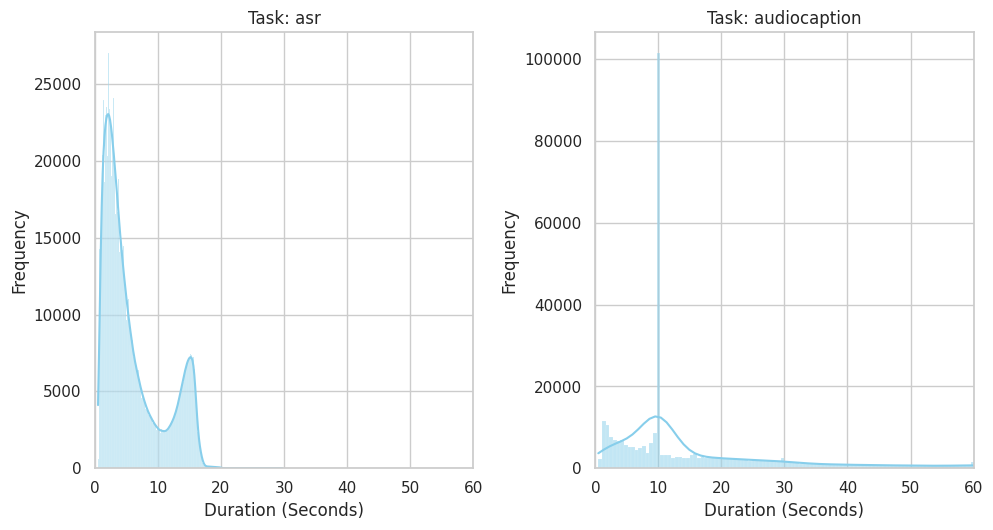

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 서브플롯의 행과 열 설정 (3x2 형태에서 5개의 플롯만 사용)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # 2행 3열의 서브플롯
axes = axes.flatten()  # 2D 배열을 1D로 변환

# task의 고유 값들로 서브플롯을 그리기
tasks = stage1_df['task'].unique()  # task의 고유 값들

# 6번째 plot을 제거하려면 tasks의 길이를 5로 제한
tasks = tasks[:5]

for i, task in enumerate(tasks):
    ax = axes[i]  # 각 서브플롯에 접근
    task_data = stage1_df[stage1_df['task'] == task]  # 해당 task의 데이터 필터링
    
    # 히스토그램 그리기
    sns.histplot(task_data, x='duration', kde=True, ax=ax, color='skyblue', multiple='stack')
    
    # # x축과 y축 범위 설정
    ax.set_xlim(0, 60)
    # ax.set_ylim(0, 35000)
    
    # 그래프 제목과 레이블 추가
    ax.set_title(f'Task: {task}')
    ax.set_xlabel('Duration (Seconds)')
    ax.set_ylabel('Frequency')

# 나머지 서브플롯 비워두기
for j in range(len(tasks), len(axes)):
    fig.delaxes(axes[j])  # 6번째 플롯 제거

# 서브플롯 간 간격 조정
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # hspace: 수직 간격, wspace: 수평 간격

# 그래프 출력
plt.tight_layout()
plt.show()


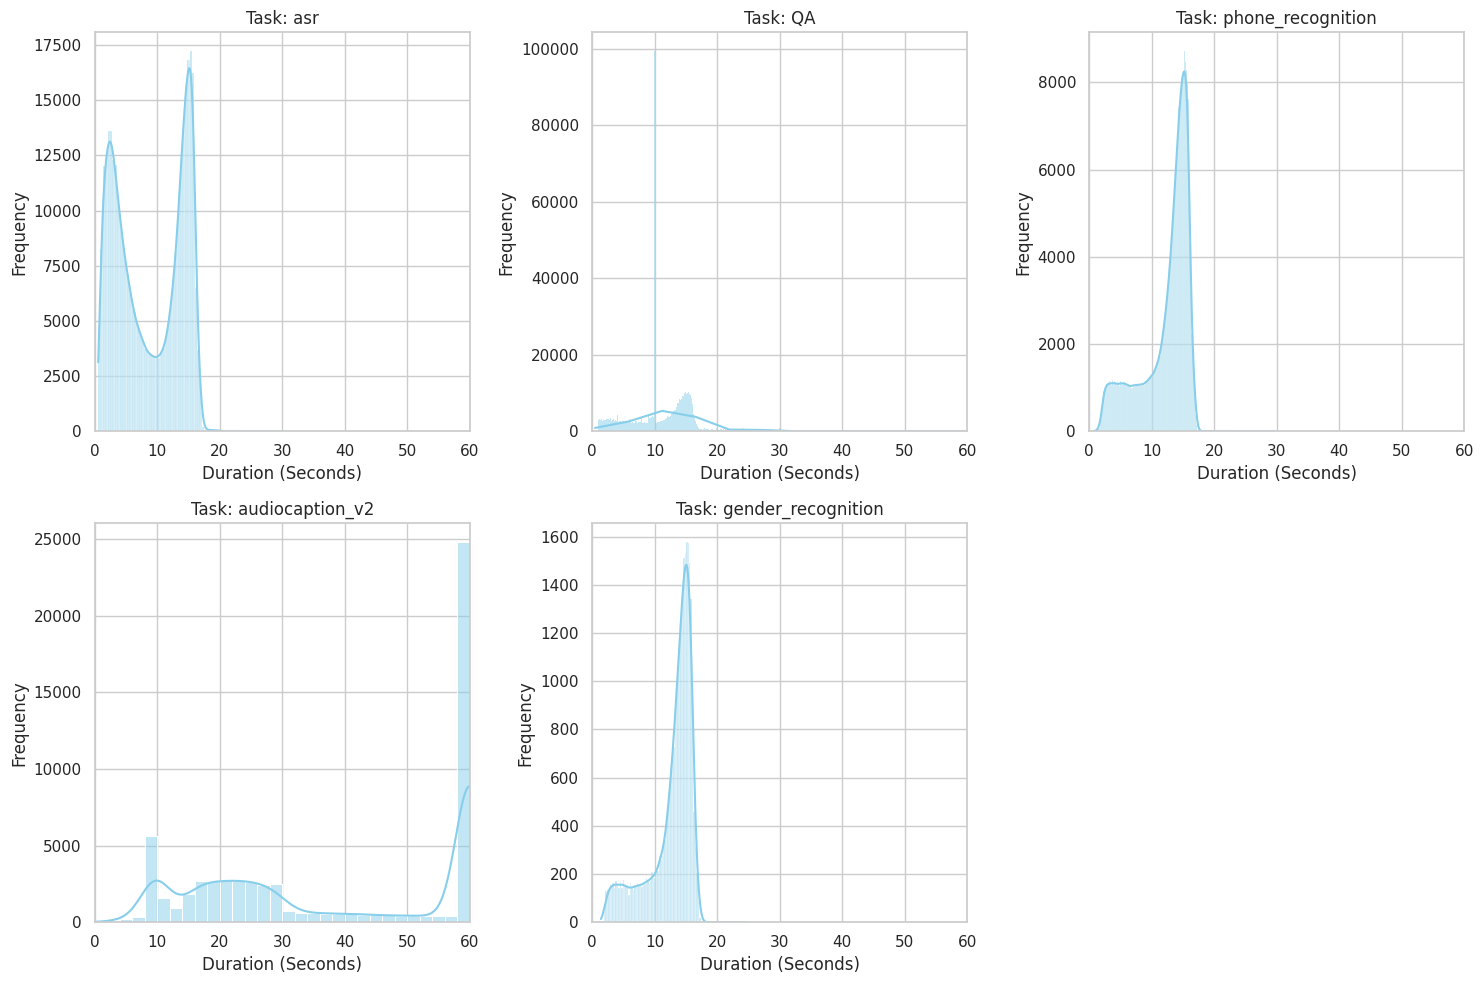

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 서브플롯의 행과 열 설정 (3x2 형태에서 5개의 플롯만 사용)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # 2행 3열의 서브플롯
axes = axes.flatten()  # 2D 배열을 1D로 변환

# task의 고유 값들로 서브플롯을 그리기
tasks = stage2_df['task'].unique()  # task의 고유 값들

# 6번째 plot을 제거하려면 tasks의 길이를 5로 제한
tasks = tasks[:5]

for i, task in enumerate(tasks):
    ax = axes[i]  # 각 서브플롯에 접근
    task_data = stage2_df[stage2_df['task'] == task]  # 해당 task의 데이터 필터링
    
    # 히스토그램 그리기
    sns.histplot(task_data, x='duration', kde=True, ax=ax, color='skyblue', multiple='stack')
    
    # # x축과 y축 범위 설정
    ax.set_xlim(0, 60)
    # ax.set_ylim(0, 30000)
    
    # 그래프 제목과 레이블 추가
    ax.set_title(f'Task: {task}')
    ax.set_xlabel('Duration (Seconds)')
    ax.set_ylabel('Frequency')

# 나머지 서브플롯 비워두기
for j in range(len(tasks), len(axes)):
    fig.delaxes(axes[j])  # 6번째 플롯 제거

# 서브플롯 간 간격 조정
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # hspace: 수직 간격, wspace: 수평 간격

# 그래프 출력
plt.tight_layout()
plt.show()


In [80]:
stage1_df['task'].value_counts()

task
asr             1191381
audiocaption     382177
Name: count, dtype: int64

In [81]:
stage2_df['task'].value_counts()

task
QA                    551759
asr                   481241
phone_recognition     281239
audiocaption_v2        61112
gender_recognition     28539
Name: count, dtype: int64

In [84]:
c = stage2_df['task'] == 'gender_recognition'
stage2_df['text'][c].head(20)

23     Female
63       Male
98       Male
141    Female
299      Male
303    Female
315    Female
317    Female
373    Female
381    Female
424      Male
454      Male
462    Female
489    Female
587    Female
602      Male
703    Female
713    Female
733    Female
816      Male
Name: text, dtype: object

In [102]:
stage2_df[stage2_df['text'].isna()]['path'].values

array(['LibriSpeech/train-other-500/252/132011/252-132011-0021.flac',
       'LibriSpeech/train-other-500/7424/98598/7424-98598-0014.flac',
       'LibriSpeech/train-clean-360/6567/53342/6567-53342-0110.flac',
       'LibriSpeech/train-clean-360/2053/138888/2053-138888-0039.flac',
       'LibriSpeech/train-clean-360/1769/143485/1769-143485-0032.flac'],
      dtype=object)

In [103]:
stage2_df[stage2_df['text'].isna()]

,Unnamed: 0,path,duration,text,task,Q
94797,94797,LibriSpeech/train-other-500/252/132011/252-132...,14.595,NaN,QA,What did Novosiltsev receive as an answer?
293282,293282,LibriSpeech/train-other-500/7424/98598/7424-98...,15.265,NaN,QA,What was the only part we had in the cross?
370745,370745,LibriSpeech/train-clean-360/6567/53342/6567-53...,6.755,NaN,QA,Who spoke touching words to the speaker's heart?
479893,479893,LibriSpeech/train-clean-360/2053/138888/2053-1...,11.280,NaN,QA,What does the speaker intend to have for the o...
729475,729475,LibriSpeech/train-clean-360/1769/143485/1769-1...,13.035,NaN,QA,What benefit would the species receive from al...


In [107]:
stage2_df[stage2_df['task'] == 'QA']

,Unnamed: 0,path,duration,text,task,Q
1,1,LibriSpeech/train-clean-100/6836/61803/6836-61...,14.295000,Maurice Gerald,QA,Who has been acquitted?
2,2,LibriSpeech/train-clean-100/8425/246962/8425-2...,13.995000,Leopold lay wound in the net of a low fever al...,QA,What was Leopold's condition before morning?
3,3,LibriSpeech/train-other-500/4969/73975/4969-73...,8.865000,The choice between right and wrong placing app...,QA,What appeared to the speaker?
5,5,WavCaps/FreeSound/90000-120000/245036.flac,8.775750,The vending machine.,QA,What is spinning?
7,7,WavCaps/FreeSound/30000-60000/97745.flac,4.440000,The sound of a coin turning over a porcelain p...,QA,What sound is playing?
...,...,...,...,...,...,...
1403881,1403881,LibriSpeech/train-other-500/448/135065/448-135...,6.240000,The speaker considered it best to depart witho...,QA,Why did the speaker decide to leave without se...
1403883,1403883,WavCaps/FreeSound/60000-90000/215392.flac,13.839125,Retrieving a pen from it with velcro.,QA,What is someone doing with a messenger bag?
1403884,1403884,WavCaps/FreeSound/0-30000/3822.flac,13.000000,A low frequency drone.,QA,What sound is being described?
1403886,1403886,LibriSpeech/train-clean-100/1034/121119/1034-1...,2.460000,"I'm not sure, the sentence doesn't provide con...",QA,Why do you think this fellow needs to be excus...


In [38]:
p = stage2_df.iloc[293282]['path']
print(p)

WavCaps/FreeSound/60000-90000/215392.flac


In [19]:
from IPython.display import Audio

# FLAC 파일의 경로
path_to_flac = '../audio_data/' + 'LibriSpeech/train-other-500/7424/98598/7424-98598-0014.flac'

# Audio 객체 생성과 동시에 재생
audio = Audio(filename=path_to_flac)

# 재생 위젯 표시
display(audio)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [1]:
import speech_recognition as sr

def speech_to_text(audio_file):
    recognizer = sr.Recognizer()

    with sr.AudioFile(audio_file) as source:
        audio_data = recognizer.record(source)

    try:
        # Set language to English
        text = recognizer.recognize_google(audio_data, language='en-US')
        return text
    except sr.UnknownValueError:
        print("The speech could not be recognized.")
    except sr.RequestError:
        print("Could not access the Google Web API.")
    
    return None

if __name__ == "__main__":
    audio_file = "/data/nota/audio_data/LibriSpeech/train-other-500/252/132011/252-132011-0021.flac"  # Change this to the path of your .flac audio file
    text = speech_to_text(audio_file)

    if text:
        print("The speech has been converted to text:")
        print(text)

The speech has been converted to text:
what answer did novelty of get none the English have not understood and cannot understand it's a self-abnegation of our emperor wants nothing for himself but only desires the good of mankind


"Novosiltsev received an answer about the self-abnegation of the emperor, stating that the emperor wants nothing for himself but only desires the good of mankind."


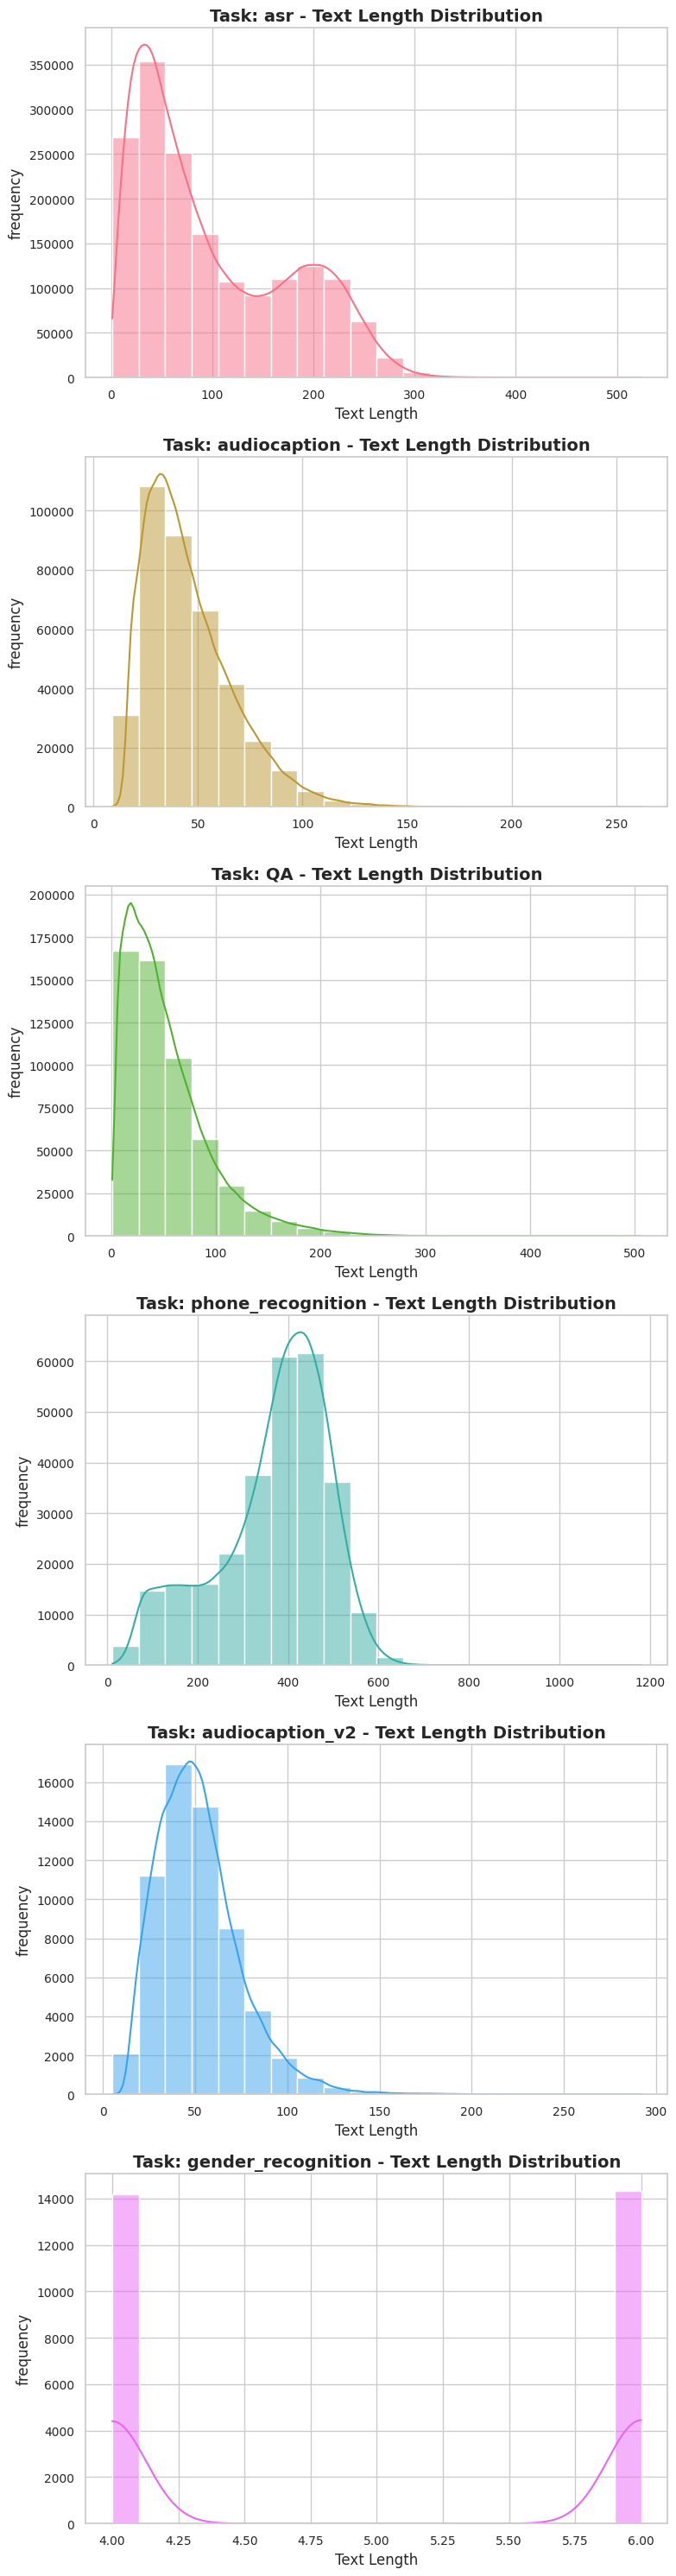

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# JSON 파일들이 있는 폴더 경로
folder_path = "/data/nota/eda용json/train"

# task별 text 길이를 저장할 딕셔너리
task_text_lengths = defaultdict(list)

# 폴더 내 JSON 파일 반복 처리
for file_name in os.listdir(folder_path):
    if file_name.endswith(".json"):  # JSON 파일만 처리
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, "r", encoding="utf-8") as file:
            try:
                data = json.load(file)
                annotations = data.get("annotation", [])
                for item in annotations:
                    if "task" in item and "text" in item:  # 'task'와 'text'가 존재하는 경우
                        text_length = len(item["text"])  # 문자열 길이 계산
                        task_text_lengths[item["task"]].append(text_length)  # task별로 길이 저장
            except json.JSONDecodeError:
                print(f"파일 {file_name}에서 오류 발생. 건너뜁니다.")

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 색상 팔레트 설정 (그래프별 다른 색상 적용)
palette = sns.color_palette("husl", len(task_text_lengths))

# 각 task별 개별 그래프 생성
num_tasks = len(task_text_lengths)
fig, axes = plt.subplots(num_tasks, 1, figsize=(8, 5 * num_tasks))  # task 수에 따라 서브플롯 생성

# task가 하나만 있을 경우 리스트로 변환
if num_tasks == 1:
    axes = [axes]  

# 각 task별로 그래프 그리기
for ax, (task, lengths), color in zip(axes, task_text_lengths.items(), palette):
    sns.histplot(lengths, kde=True, bins=20, ax=ax, color=color)
    ax.set_title(f"Task: {task} - Text Length Distribution", fontsize=14, fontweight="bold")
    ax.set_xlabel("Text Length", fontsize=12)
    ax.set_ylabel("frequency", fontsize=12)
    ax.tick_params(axis="both", labelsize=10)

plt.tight_layout()  # 그래프 간격 조정
plt.show()


# 3. Test 

## Make test CSV (with duration)

In [45]:
import json
import pandas as pd
import librosa
from tqdm import tqdm
import os

json_path = '../eda용json/test/test_asr.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

ann = data.get('annotation', [])

audio_length = []

for item in tqdm(ann):
    audio_path = item.get('path','')
    if audio_path[0] == '/':
        audio_path = audio_path[1:]

    full_path = os.path.join('/data/nota/audio_data/', audio_path)
    y, sr = librosa.load(full_path, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)

    text = item.get('text', '')
    task = item.get('task', '')
    Q = item.get('Q', None)

    audio_length.append({'path':audio_path, 'duration':duration, 'text':text, 'task':task, 'Q':Q})

test_asr_df = pd.DataFrame(audio_length)
test_asr_df.to_csv('/data/nota/EDA/test_asr.csv', sep=',', encoding='utf-8', header=True)

100%|██████████| 2939/2939 [00:18<00:00, 158.86it/s]


In [47]:
import json
import pandas as pd
import librosa
from tqdm import tqdm
import os

json_path = '../eda용json/test/test_aac.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

ann = data.get('annotation', [])

audio_length = []

for item in tqdm(ann):
    audio_path = item.get('path','')
    if audio_path[0] == '/':
        audio_path = audio_path[1:]

    full_path = os.path.join('/data/nota/audio_data/', audio_path)
    y, sr = librosa.load(full_path, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)

    text = item.get('text', '')
    task = item.get('task', '')
    Q = item.get('Q', None)

    audio_length.append({'path':audio_path, 'duration':duration, 'text':text, 'task':task, 'Q':Q})

test_aac_df = pd.DataFrame(audio_length)
test_aac_df.to_csv('/data/nota/EDA/test_aac.csv', sep=',', encoding='utf-8', header=True)

100%|██████████| 4355/4355 [02:51<00:00, 25.41it/s]


### Test Task

In [ ]:
import os
import json
from collections import Counter

# JSON 파일들이 있는 폴더 경로
folder_path = "/data/nota/eda용json/test"

# 모든 JSON 파일에서 'task' 카테고리 합산
category_counts = Counter()

# 폴더 내 JSON 파일 반복 처리
for file_name in os.listdir(folder_path):
    if file_name.endswith(".json"):  # JSON 파일만 처리
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, "r", encoding="utf-8") as file:
            data = json.load(file)
            annotations = data.get("annotation", [])
            task_categories = [item.get("task") for item in annotations if "task" in item]
            category_counts.update(task_categories)  # 현재 파일의 카테고리 개수 합산

# 결과 출력
for category, count in category_counts.items():
    print(f"'{category}': {count}개")


'asr': 2939개
'audiocaption_v2': 4355개


## EDA

### Test Audio duration

In [1]:
import pandas as pd

test_asr_df = pd.read_csv('/data/nota/EDA/test_asr.csv')
test_aac_df = pd.read_csv('/data/nota/EDA/test_aac.csv')

In [2]:
test_aac_df

,Unnamed: 0,path,duration,text,task,Q
0,0,audiocaps/test/103549.wav,60.000,NaN,audiocaption_v2,NaN
1,1,audiocaps/test/103548.wav,7.430,NaN,audiocaption_v2,NaN
2,2,audiocaps/test/103541.wav,29.149,NaN,audiocaption_v2,NaN
3,3,audiocaps/test/103542.wav,60.000,NaN,audiocaption_v2,NaN
4,4,audiocaps/test/103545.wav,60.000,NaN,audiocaption_v2,NaN
...,...,...,...,...,...,...
4350,4350,audiocaps/test/103094.wav,15.472,NaN,audiocaption_v2,NaN
4351,4351,audiocaps/test/103093.wav,34.389,NaN,audiocaption_v2,NaN
4352,4352,audiocaps/test/103092.wav,60.000,NaN,audiocaption_v2,NaN
4353,4353,audiocaps/test/103091.wav,60.000,NaN,audiocaption_v2,NaN


In [4]:
test_asr_df

,Unnamed: 0,path,duration,text,task,Q
0,0,LibriSpeech/test-other/1688/142285/1688-142285...,15.000,NaN,asr,NaN
1,1,LibriSpeech/test-other/1688/142285/1688-142285...,12.625,NaN,asr,NaN
2,2,LibriSpeech/test-other/1688/142285/1688-142285...,2.835,NaN,asr,NaN
3,3,LibriSpeech/test-other/1688/142285/1688-142285...,5.060,NaN,asr,NaN
4,4,LibriSpeech/test-other/1688/142285/1688-142285...,4.475,NaN,asr,NaN
...,...,...,...,...,...,...
2934,2934,LibriSpeech/test-other/8461/281231/8461-281231...,9.120,NaN,asr,NaN
2935,2935,LibriSpeech/test-other/8461/281231/8461-281231...,9.770,NaN,asr,NaN
2936,2936,LibriSpeech/test-other/8461/281231/8461-281231...,6.740,NaN,asr,NaN
2937,2937,LibriSpeech/test-other/8461/281231/8461-281231...,7.330,NaN,asr,NaN


### Test_asr df

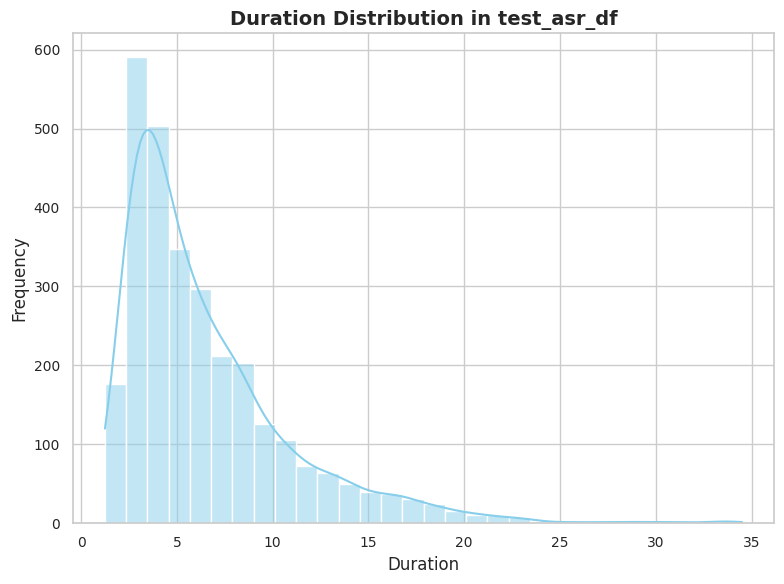

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.histplot(test_asr_df['duration'], kde=True, bins=30, color='skyblue')

plt.title("Duration Distribution in test_asr_df", fontsize=14, fontweight="bold")
plt.xlabel("Duration", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tick_params(axis="both", labelsize=10)

plt.tight_layout()
plt.show()


### Test_aac df

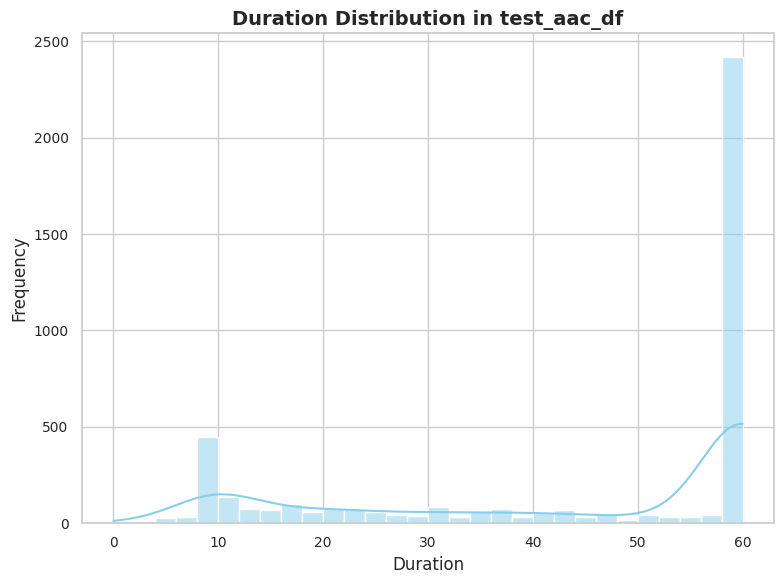

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.histplot(test_aac_df['duration'], kde=True, bins=30, color='skyblue')

plt.title("Duration Distribution in test_aac_df", fontsize=14, fontweight="bold")
plt.xlabel("Duration", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tick_params(axis="both", labelsize=10)

plt.tight_layout()
plt.show()
